### Overall model

In [1]:
import pickle 

with open('./pickle/prediction_results.pkl', 'rb') as handle:
    result = pickle.load(handle)

In [2]:
import sklearn.metrics as sklm
import numpy as np

overall_score = []
overall_target = []

accuracy_list = []

for i in range(10):
    
    overall_score.extend(result[i]['overall']['score'].tolist())
    overall_target.extend(result[i]['overall']['target'].tolist())
    
    current_prediction = np.round(result[i]['overall']['score'])
    accuracy = sklm.accuracy_score(result[i]['overall']['target'], current_prediction)
    
    accuracy_list.append(accuracy)

In [3]:
print("Average Accuracy: %f with std %f" %(np.mean(accuracy_list), np.std(accuracy_list)))

Average Accuracy: 0.822416 with std 0.033313


In [4]:
# classification_report

overall_prediction = np.round(overall_score)

print(sklm.classification_report(overall_target, overall_prediction))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88      1523
          1       0.72      0.59      0.65       594

avg / total       0.82      0.82      0.82      2117



In [5]:
# tn, fp, fn, tp

print(sklm.confusion_matrix(overall_target, overall_prediction))

[[1388  135]
 [ 241  353]]


In [6]:
sklm.roc_auc_score(overall_target, overall_score)

0.8268204036424653

In [7]:
tn, fp, fn, tp = sklm.confusion_matrix(overall_target, overall_prediction).ravel()

print(tn, fp, fn, tp)

1388 135 241 353


/home/pliu19/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/pliu19/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


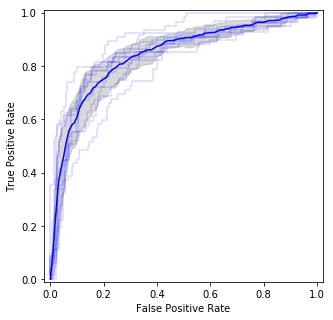

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
%matplotlib inline


tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))

for i  in range(10):
    
    scrore = result[i]['overall']['score'].tolist()
    target = result[i]['overall']['target'].tolist()
    
    fpr, tpr, _ = roc_curve(target, scrore)

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

### Top 25

In [9]:
RATIO = 25

def top_precision(score, targ, RATIO=25):
            
    if RATIO > (len(score)/2):
        
        raise "Error: not enough instances"
    
    top_positive_indices = np.argsort(score, axis=0)[::-1][:RATIO].flatten()
    top_negative_indices = np.argsort(score, axis=0)[:RATIO].flatten()
    
    top_positive_targ = [1] * RATIO
    top_negative_targ = [0] * RATIO
    
    predic = top_positive_targ + top_negative_targ
    target =  targ[top_positive_indices].tolist() + targ[top_negative_indices].tolist()   
        
    return sklm.accuracy_score(target, predic)

In [10]:
top_score = []
top_target = []

top_accuracy_list = []

for i in range(10):
    
    top_score.extend([1] * RATIO)
    top_target.extend(result[i]['pos_25']['target'].tolist())
    
    top_score.extend([0] * RATIO)
    top_target.extend(result[i]['neg_25']['target'].tolist())
    
    current_predic = [0] * RATIO + [1] * RATIO
    current_target = result[i]['neg_25']['target'].tolist() + result[i]['pos_25']['target'].tolist()
    
    current_predic = np.round(current_predic)
    
    accuracy = sklm.accuracy_score(current_target, current_predic)
    
    top_accuracy_list.append(accuracy)
    
print("Average Accuracy: %f with std %f" %(np.mean(top_accuracy_list), np.std(top_accuracy_list)))

Average Accuracy: 0.876000 with std 0.035553


In [11]:
top_prediction = np.round(top_score)

print(sklm.classification_report(top_target, top_prediction))

             precision    recall  f1-score   support

          0       0.94      0.84      0.88       280
          1       0.82      0.93      0.87       220

avg / total       0.88      0.88      0.88       500



In [12]:
print(sklm.confusion_matrix(top_target, top_prediction))

[[234  46]
 [ 16 204]]


In [15]:
sklm.roc_auc_score(top_target, top_score)

0.8814935064935066

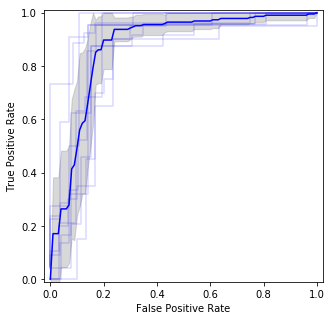

In [16]:
tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))

for i  in range(10):
    
    current_score = result[i]['neg_25']['score'].tolist() + result[i]['pos_25']['score'].tolist()
    current_target = result[i]['neg_25']['target'].tolist() + result[i]['pos_25']['target'].tolist()
    
    fpr, tpr, _ = roc_curve(current_target, current_score)

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

### Score for each bin

In [17]:
overall_score = []
overall_target = []

for i in range(10):
    
    overall_score.extend(result[i]['overall']['score'].tolist())
    overall_target.extend(result[i]['overall']['target'].tolist())
    
overall_score = np.array(overall_score).flatten()
overall_target = np.array(overall_target)

In [18]:
indices = np.argsort(overall_score)

overall_score[indices[0]]

0.0002544631133787334

In [19]:
sorted_score = overall_score[indices]
sorted_target = overall_target[indices]

sorted_predic = np.round(sorted_score)

In [20]:
def split_scores(scores, targets, n_splitting=10):
        
    flag = {}
    record = {}
    
    for i in range(n_splitting):
        
        flag[i] = (i+1)/(n_splitting)
        record[i] = {}
        record[i]['score'] = []
        record[i]['target'] = [] 
        
    sta = 0
    key = flag[sta]
    
    for score, target in zip(scores, targets):
        
        if score > key:
            
            sta += 1
            key = flag[sta]
            
        record[sta]['score'].append(score)
        record[sta]['target'].append(target)
        
    accur_list = []
    count_list = []
    
    for key, value in sorted(record.items()):
        
        acc = sklm.accuracy_score(value['target'], np.round(value['score']))
        
        accur_list.append(acc)
        count_list.append(len(value['score']))
    
    return accur_list, count_list
                
accur_list, count_list = split_scores(sorted_score, sorted_target)

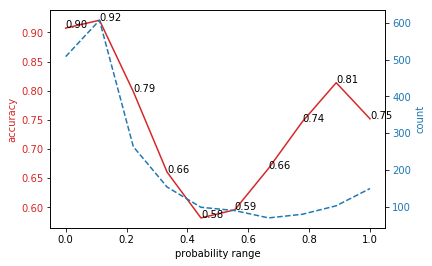

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('probability range')
ax1.set_ylabel('accuracy', color=color)
ax1.plot(np.linspace(0,1,10), accur_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

for a,b in zip(np.linspace(0,1,10), accur_list): 
    ax1.text(a, b, str(b)[:4])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0,1,10), count_list, color=color, linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)

# fig.savefig("binned_accuracy.svg", format="svg")

fig.show()

### Proba theshold

In [22]:
from collections import Counter

def top_accuracy(score, targ, RATIO=0.05):
    
    s_list = []
    t_list = []
    t_list_pos = []
    t_list_neg = []
    
    for s, t in zip(score, targ):
        
        if s > RATIO or s < (1-RATIO):
            
            s_list.append(s)
            t_list.append(t)
            
            if s > RATIO:
                t_list_pos.append(t)
            else:
                t_list_neg.append(t)
            
    s_list = np.round(s_list)
            
    return sklm.accuracy_score(t_list, s_list), len(t_list), t_list

In [23]:
ratios = [0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]

accuracy_list = {}

count_list = []
count_pos = []
count_neg = []

for num in ratios:
    
    accuracy_list[num] = []
    
    count = 0 
    clist = []

    for i in range(10):

        score = result[i]['overall']['score']
        targt = result[i]['overall']['target']

        acc, c, c_list = top_accuracy(score, targt, num)
        accuracy_list[num].append(acc)
        
        count += c
        
        clist.extend(c_list)
        
    c_pos = Counter(clist)[1]
    c_neg = Counter(clist)[0]
    
    count_list.append(count)
    count_pos.append(c_pos)
    count_neg.append(c_neg)

In [24]:
acc_list = []
std_list = []

for num in ratios:
    
    acc_list.append(np.mean(accuracy_list[num]))
    std_list.append(np.std(accuracy_list[num]))

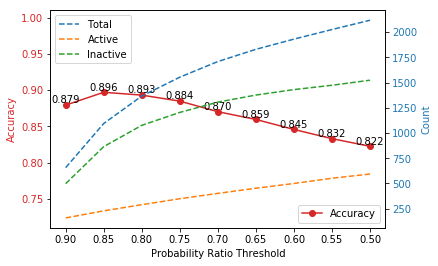

In [25]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Probability Ratio Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(ratios, acc_list, 'o-', color=color, label='Accuracy')
ax1.set_ylim([0.71, 1.01])
ax1.tick_params(axis='y', labelcolor=color)

for a,b in zip(ratios, acc_list): 
    ax1.text(a, b, str(b)[:5], verticalalignment='bottom', ha='center')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Count', color=color)  # we already handled the x-label with ax1

ax2.plot(ratios, count_list,linestyle="--", label='Total')
ax2.plot(ratios, count_pos, linestyle="--", label='Active')
ax2.plot(ratios, count_neg, linestyle="--", label='Inactive')
ax2.tick_params(axis='y', labelcolor=color)

ax1.invert_xaxis()

ax1.legend(loc='lower right')
ax2.legend(loc='upper left')

# fig.savefig("threshold_v2.svg", format="svg")

fig.show()